Prevalence of Disease
---

The larger query has examined the presence and rate of occurence of certain disease names in corpus. Here we want 1) to look at this data, 2) graph it per year, and eventually 3) compare these diseases. We will also need to 4) normalise the data, to account for increased publishing activity over time.


Import relevant libraries and data
----

In [4]:
#!pip install --user PyYAML
#!pip install --user matplotlib

In [1]:
import os, site
os.environ["PYTHONPATH"]= site.USER_BASE+"/lib/python/site-packages:"+os.environ["PYTHONPATH"]


In [3]:
!echo $PYTHONPATH

/home/users/rfilguei/.local/lib/python/site-packages:/usr/bin/python


In [4]:
import yaml
import matplotlib.pyplot as plt


Here, change the search term and the result file by commenting out the ones you don't want to use

In [23]:
#disease_list=["whooping", "cancer", "consumption", "diphtheria", "measles", "smallpox", "typhoid", "cholera" , \
#              "diarrhoea", "dysentry", "phthisis", "tuberculosis", "typhus", ]

disease_list=["whooping", "measles", "cholera", "consumption"]



./data/whooping.yml


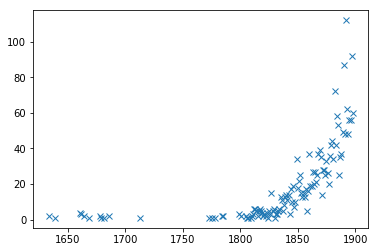

./data/measles.yml


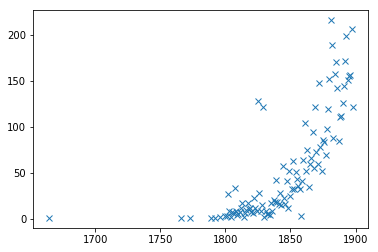

./data/cholera.yml


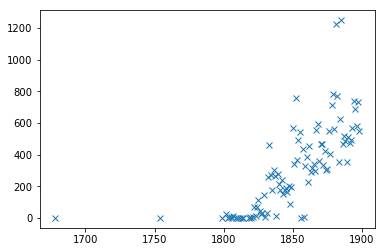

./data/consumption.yml


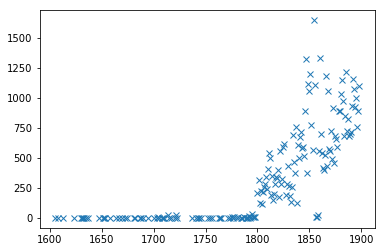

In [24]:
for disease in disease_list:
    filename="./data/"+disease+".yml"
    print filename
    with open(filename, 'r') as f:
        results = yaml.load(f)
        #print results[disease]
        plt.plot(results[disease].keys(), results[disease].values(), 'x')
        plt.show()

Bokeh
---

Bokeh is a library which lets us create interactive web-based graphs and charts.

Here, we're importing the libary, creating a graph with appropriate axis names, and displaying it in a web browser. We could put this on a web server or embed it in an html page (one which allows JavaScript).


In [13]:
#!pip install --user bokeh

In [76]:
from bokeh.plotting import figure, output_file, show


In [29]:
disease="whooping"
filename="./data/"+disease+".yml"
with open(filename, 'r') as f:
    results = yaml.load(f)

print results[disease]    
       

{1799: 3, 1801: 2, 1805: 2, 1806: 1, 1807: 1, 1809: 1, 1810: 2, 1811: 3, 1812: 6, 1813: 6, 1814: 5, 1815: 2, 1816: 5, 1817: 6, 1818: 5, 1819: 4, 1820: 2, 1821: 3, 1822: 2, 1823: 4, 1824: 1, 1825: 5, 1826: 3, 1827: 15, 1828: 5, 1829: 6, 1830: 1, 1831: 3, 1832: 3, 1833: 5, 1834: 6, 1835: 13, 1836: 11, 1837: 5, 1838: 8, 1839: 13, 1840: 14, 1841: 11, 1842: 14, 1843: 3, 1844: 17, 1845: 10, 1846: 19, 1847: 7, 1848: 10, 1849: 34, 1850: 18, 1851: 22, 1852: 25, 1853: 15, 1854: 13, 1855: 15, 1856: 13, 1857: 17, 1858: 5, 1859: 16, 1860: 37, 1861: 19, 1862: 19, 1863: 27, 1864: 20, 1865: 27, 1866: 21, 1867: 25, 1868: 37, 1869: 39, 1870: 35, 1871: 14, 1872: 28, 1873: 28, 1874: 25, 1875: 33, 1876: 26, 1877: 20, 1878: 36, 1879: 42, 1880: 44, 1881: 34, 1882: 72, 1883: 42, 1884: 58, 1885: 53, 1886: 25, 1887: 35, 1888: 37, 1633: 2, 1890: 87, 1891: 48, 1892: 112, 1893: 62, 1894: 48, 1639: 1, 1896: 56, 1897: 92, 1898: 60, 1895: 56, 1660: 4, 1661: 3, 1664: 2, 1668: 1, 1678: 2, 1679: 1, 1681: 1, 1686: 2, 188

In [77]:
filename_out= disease+".html"
output_file(filename_out, title="Number of books referencing " + disease + " by year")
p = figure(title= disease + " references", x_axis_label='Year', y_axis_label='Number of books')
p.line(results[disease].keys(), results[disease].values())
show(p)

Normalisation
---

Here, we are examining the total number of books published over the period to see how much our search terms are affected by the way that the number of books (and pages, and words!) published increases over the measurement period.

In [80]:
disease="whooping"
filename="./data/"+disease+".yml"
with open(filename, 'r') as f:
    results = yaml.load(f)
      

These stages carry out **normalisation**: dividing the per year word occurence with the per year book occurence to get a words per book per year measure. 

**With new data we can normalise this as a ratio of words/word**


In [81]:
normal_filename = 'normaliser.yml'
with open('data/' + normal_filename, 'r') as f:
    publication = yaml.load(f)

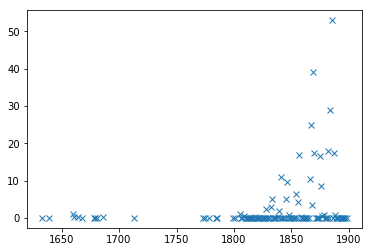

In [82]:
normed_results = {}
for year in results[disease]:
    if year>0:
        normed_results[year] = results[disease][year]/float(publication[year][0])
plt.plot(normed_results.keys(), normed_results.values(), 'x')
plt.show()       

In [83]:
normal_filename = 'normaliser_ucl.yml'
with open('data/' + normal_filename, 'r') as f:
    publication = yaml.load(f)

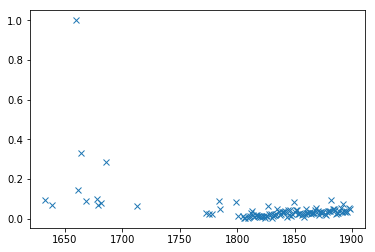

In [84]:
normed_results = {}
for year in results[disease]:
    if year>0:
        normed_results[year] = results[disease][year]/float(publication[year][0])
plt.plot(normed_results.keys(), normed_results.values(), 'x')
plt.show()       

In [78]:
output_file(disease + ".html", title="Proportion of books referencing " + disease + " by year")
p = figure(title= disease + " references", x_axis_label='Year', y_axis_label='Number of books')
p.scatter(normed_results.keys(), normed_results.values())
show(p)